## Perkenalan

=================================================

   Milestone 2

   Nama  : Mardhya Malik Nurbani
   Batch : RMT-026

   Program ini dibuat untuk menganalisa sebuah dataset  beranama Bank Marketing 
   dengan menggunakan konsep Classification, terutama Random Forest, XGboost, Decision Tree, SVM, dan KNN untuk memprediksi apakah nasabalah telah melanggan produk deposito berjangka dari institusi perbankan atau tidak.

=================================================

## Conceptual Problems

*Jawab pertanyaan berikut:*

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

3. Jelaskan apa yang dimaksud dengan Cross Validation !

**JAWABAN**

1. Latar belakang adanya bagging ini muncul untuk meningkatkan kinerja dari hasil prediktif dengan menggabungkan lebih dari satu model.
    - Cara Kerja Bagging:
        1. Pembuatan dataset Bootstrap.
            - Membuat dataset baru dengan variasi.
        2. Pelatihan Model.
            - Model dilatih pada setiap dataset bootstrep
        3. Voting/Averaging.
            - Hasil dari prediksi dari model, akan digabungkan melalui Voting(Klasifikasi) atau Averaging (Regresi)
    - Keuntungan :
        - Bagging ini bisa mengurangi overfitting dan meningkat kan kinerja model model dengan memanfaatka bootstrep.

2. 1. Model Dasar :
        - `Random Forest` : membuat banyak pohon keputusan secara independen.
        - `XGBOOST` : membuat pohon secara berurutan dengan fokus pada instance yang sulit diatasi oleh model sebelumnya.
    2. Bobot Instance :
        - `Random Forest` : memberikan bobot yang sama untuk semua instance
        - `XGBOOST` : memberikan bobot lebih tinggi untuk instance yang sulit diatasi.
        
        _instance merujuk pada satu baris data dalam dataset_
    3. Prediksi model Dasar :
        - `Random Forest` : menggunakan metode mayoritas atau rata-rata,
        - `XGBOOST` : menggabungkan prediksi dengan memberikan bobot pada masing-masing pohon.
    4. Overfitting :
        - `Random Forest` : mengandalkan variasi antar pohon untuk mengurangi overfitting
        - `XGBOOST` : menggunakan teknik regularisasi dan penanganan overfitting yang lebih kuat.
    5. Optimasi dan Kecepatan :
        - `Random Forest` :  bisa bekerja secara paralel
        - `XGBOOST` : dirancang untuk bekerja dengan sangat efisien dan mendukung komputasi paralel.

        _Perbedaannya terletak pada pembentukan pohon (independen vs. berurutan), pengelolaan bobot instance, dan teknik pengendalian overfitting._

3. Cross-validation adalah cara untuk menguji seberapa baik model machine learning dapat berfungsi pada data yang tidak terlihat. Ini melibatkan pembagian data menjadi bagian Train dan Test.Proses ini akan diulang beberapa kali dengan pembagian yang berbeda untuk mendapat kan nilai rata rata untuk gambaran seberapa baik model memprediksi data baru. Cross-validation juga baik digunakan untuk menghindari `OverFitting`.


## Import Libraries

In [1]:
#import libraries yg dibutuhkan
import pandas as pd #memanggil pandas sebagai pd
import matplotlib.pyplot as plt # memanggil matplotlib sebagai plt
import numpy as np #memanggil numpy sebagai np
import seaborn as sns #memanggil seaborn sebagai sns
from sklearn.model_selection import train_test_split #memanggil train_test dari sklearn model
from feature_engine.outliers import Winsorizer #memanggil winsorizer dari feature engine
from scipy.stats import kendalltau, pearsonr #memanggil kendalltau dan pearsonr dari scipy.stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler #mamanggil minmaxscaler dan StandardScaler dari sklearn processing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder #memanggil model encode onehotencoder,LabelEncoder,OrdinalEncoder dari sklearn processing
import pickle #memanggil pickle
from sklearn.metrics import classification_report, accuracy_score,  f1_score #memanggil classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score dari sklearn.metrics 
from sklearn.model_selection import GridSearchCV, cross_val_score #memanggil GridSearchCV, cross_val_score, StratifiedKFold, learning_curve dari from sklearn.model_selection
from sklearn.compose import ColumnTransformer, make_column_selector as selector #Memanggil ColumnTransformer, make_column_selector dari sklearn.compose sebagai selector
from sklearn.pipeline import Pipeline #Memanggil Pipeline dari sklearn.pipelin
from sklearn.neighbors import KNeighborsClassifier #Memanggil  KNeighborsClassifier dari sklearn.neighbors
from sklearn.svm import SVC #Memanggil  SVC dari sklearn.svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



## Data Loading

_Sumber : https://www.kaggle.com/datasets/rouseguy/bankbalanced_

In [2]:
#import file P1G5_Set_1_mardhya.csv
df = pd.read_csv('Banking Marketing.csv') 

In [3]:
#menampilkan summary
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

**Insight** Dataset yang digunakan memiliki 17 column dengan total data sebesar 11162. terdapat 7 column yang menrupakan tipe data int64, dan 10 column bertipe object.

In [5]:
#tampilan data 10 teratas
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


**Insight**: Data yang tertampil merupakan 10 data teratas dari dataset. Jika dilihat dari dataset yang ditampilkan, terdapat 17 kolom dataset Banking Marketing yang berisikan informasi yang berasal dari platform kaggle

In [6]:
#tampilan data 10 terbawah
df.tail(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


**Insight**: Data yang tertampil merupakan 10 data terbawah dari dataset. Jika dilihat dari dataset yang ditampilkan, terdapat 17 kolom dataset Banking Marketing yang berisikan informasi yang berasal dari platform kaggle

In [7]:
#pengecheckan data null yang terdapat pada dataset
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

**Insight**: tidak terdapat missing value dari dataset diatas.

In [8]:
df.duplicated().sum()

0

**Insight**: dari dataset diatas, t,idak terdapat data yang duplicate,maka lanjut ke proses selanjutnya.

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Histogram of Age')

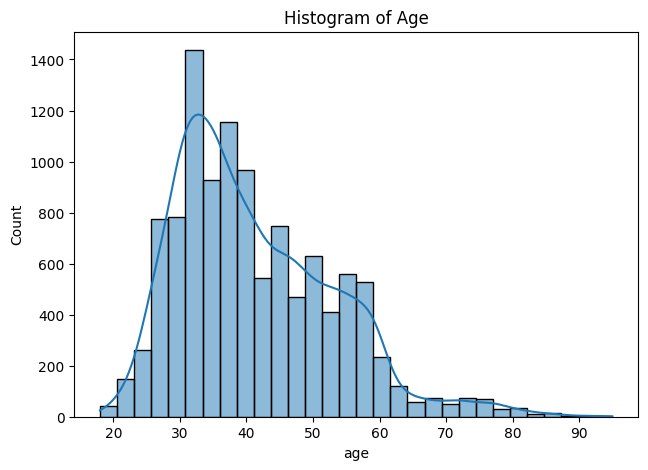

In [9]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df['age'], kde = True, bins = 30)
plt.title('Histogram of Age')

In [10]:
df['age'].mean()

41.231947679627304

**Insight:** melihat sebaran data usia, menyimpulkan bahwa rata-rata usia campaign marketing ini adalah sekitar 41.23 tahun. Informasi ini memberikan gambaran umum tentang usia kelompok, dengan nilai rata-rata yang dapat dijadikan sebagai representasi tengah dari distribusi usia.

[Text(0, 0, '223.13'), Text(0, 0, '537.29')]

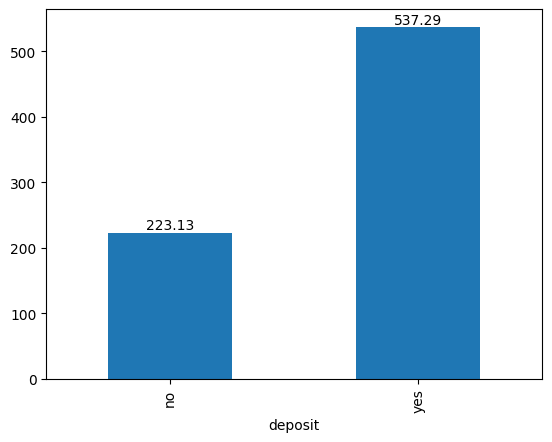

In [12]:
ax =df.groupby('deposit')['duration'].mean().round(2).plot(kind='bar')
ax.bar_label(ax.containers[0])

**Insight** : Berikut adalah rata rata dari durasi kontak terakhir (`duration`), terhadap `deposit`. dapat disimpulkan bahwa nasabah yang melakukan deposit memiliki kontak durasi lebih besar di banding yang tiddak melakukan deposit. yang artinya semakin lama melakukan kontak bersama nasabah, kemungkinan besar semakin besar untuk nasabah berlangganan deposit. hitungan durasi kontak dalam waktu dihitung dalam hitungan detik.

[Text(0, 0, '1371.84'), Text(0, 0, '1599.93'), Text(0, 0, '1457.26')]

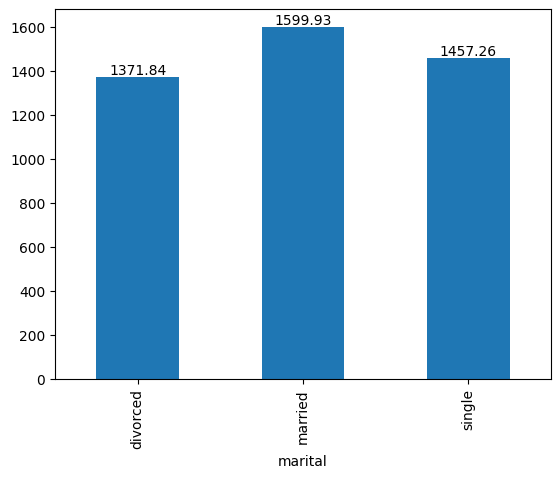

In [13]:
ax =df.groupby('marital')['balance'].mean().round(2).plot(kind='bar')
ax.bar_label(ax.containers[0])

**Insight** : Berikut merukapan rata rata dari `balance` berdasarkan status pernikahan `marital`, dari data diatas status married mempunyai rata rata balance lebih besar dari pada lainnya sebesar `1599.33`. hal ini bisa menjadi tolak ukur untuk menjadi target nasabah untuk penawaran `deposito`.

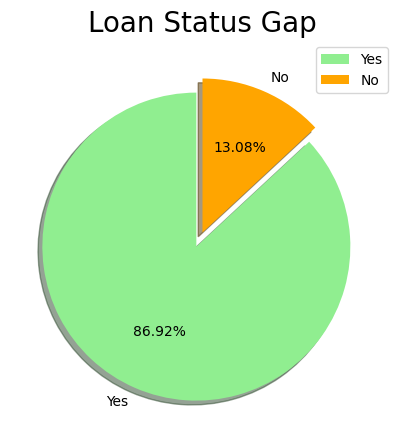

In [14]:
labels = ['Yes', 'No']
size = df['loan'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0.1, 0]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Loan Status Gap', fontsize = 20)
plt.legend()
plt.show()

**Insight** : Berdasarkan data diatas Loan dengan status `Yes` mendominasi daripada status `No` mencapai nilai `85.92%` dari total data keseluruhan. yang artinya sebanyak `85.92%`nasabah memiliki pinjaman secara pribadi. tapi hal ini tidak menjadi tolak ukur untuk menjadi apakah nasabah mengikuti program deposito atau tidak berdasarkan status loan

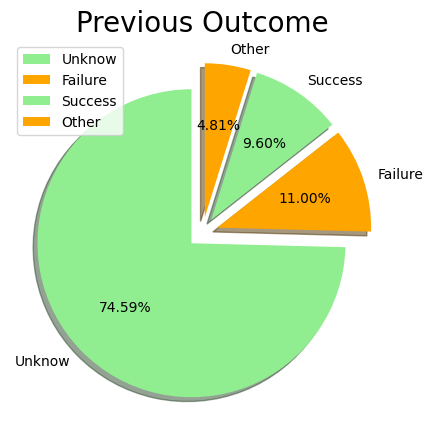

In [15]:
labels = ['Unknow', 'Failure', 'Success','Other']
size = df['poutcome'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0.1, 0.1 , 0.1 , 0.1]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Previous Outcome', fontsize = 20)
plt.legend()
plt.show()

**Insight** : data diatas merupakan hasil sebaran data dari hasil marketing campaign sebelumnya. sebagian besar, hasil marketing campaign sebelumnya tidak diketahui statusnya `Unknow` mencapai `74%`, sedangkan untuk status `Failuir` sebesar `11%` yang artinya hasil marketing campaign sebelumnya tidak berhasil / mengalami kegagalan. sedangkan untuk status `Success` sebesar `9.6%` yang artinya hasil marketing campaign sebelumnya mengalami keberhasilan sebesar `9.6%`. dan yang terakhir status dengan `Other` sebesar `4.8%` yang artinya hasil marketing campaign sebelumnya juga tidak diketahui berhasil atau tidaknya.

## Feature Engineering

In [16]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,age,76
1,balance,3805
2,day,31
3,duration,1428
4,campaign,36
5,pdays,472
6,previous,34


**Insight** : pada kolom numerik, kita lebih fokus pada karakteristik statistik, tidak melibatkan pertimbangan cardinality seperti pada kolom kategorikal.

In [17]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,job,12
1,marital,3
2,education,4
3,default,2
4,housing,2
5,loan,2
6,contact,3
7,month,12
8,poutcome,4
9,deposit,2


**Insight** : column yang memiliki high cardinality di drop agar memudahkan proses prediksi.

### Split between X (Features) and y (target)

In [18]:
#Splitting between 'X' and 'y'

X = df.drop(['deposit'], axis = 1)
y = df['deposit']
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure


**Insight:** memisahkan fitur (X) dan target (y). Target (y) dalam konteks ini adalah kolom deposit, karena kita berfokus pada prediksi apakah nasabah melakukan deposit atau tidak.

In [19]:
#Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, stratify=y)
print('x Train Size: ', X_train.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Test Size: ', y_test.shape)

x Train Size:  (8929, 16)
x Test Size:  (2233, 16)
y Train Size:  (8929,)
y Test Size:  (2233,)


**Insight:**  :
Jumlah entri atau baris data pada dataset (Train) adalah sebanyak 8929, sementara pada dataset (Test) terdapat 2233 entri. Informasi ini memberikan gambaran tentang seberapa besar sampel data yang digunakan untuk melatih dan menguji model prediksi.
`test_size=0.2` data uji akan menjadi 20% dari total dataset, `random_state=40` bertujuan untuk menentukan nilai seed atau inisialisasi acak pada proses pembagian dataset, dan `stratify=y` digunakan untuk memastikan bahwa pembagian kelas target (label) dalam data uji dan data latih tetap mengikuti proporsi yang ada pada dataset asli. 

In [20]:
#get numeric and categorical column

num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


**Insight:** :  Pada dataset ini, terdapat column numerik dan kategorikal. column numerik terdiri dari age, balance, day, duration, campaign, pdays, previous. dan column kategorikal terdiri dari job, marital, education, default, housing, loan, contact.

In [21]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,age,balance,day,duration,campaign,pdays,previous
3810,42,372,3,654,2,-1,0
2099,39,116,22,554,2,-1,0
6728,49,1807,2,225,1,82,1
10002,65,493,16,622,1,182,1
9837,48,3756,14,65,10,-1,0
...,...,...,...,...,...,...,...
5862,36,243,7,160,2,360,3
812,46,4414,18,504,7,-1,0
9388,50,280,18,61,23,-1,0
8856,40,737,12,102,1,-1,0


**Insight:** : Dataset train dan test untuk kolom numerik telah dipisahkan. Langkah ini diambil untuk melakukan uji korelasi terhadap setiap fitur, dengan tujuan melihat apakah terdapat hubungan korelasi antara fitur-fitur tersebut dengan target.

In [22]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

**Insight** : menggunakan LabelEncoder dari scikit-learn untuk mengubah nilai-nilai kategorikal dalam variabel target (y_train dan y_test) menjadi nilai numerik. 

### Uji Korelasi

In [23]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,age,ada korelasi
1,balance,ada korelasi
2,day,ada korelasi
3,duration,ada korelasi
4,campaign,ada korelasi
5,pdays,ada korelasi
6,previous,ada korelasi


**Insight** : Ditemukan bahwa semua column numerik menunjukkan korelasi yang signifikan dengan variabel target. Ketika tidak terdapat korelasi antara suatu fitur dan variabel target, hal tersebut mengindikasikan bahwa fitur tersebut mungkin tidak memberikan informasi yang cukup signifikan untuk memprediksi atau menjelaskan variabel target.``

In [24]:
# Feature selection Kategorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,job,ada korelasi
1,marital,ada korelasi
2,education,ada korelasi
3,default,ada korelasi
4,housing,ada korelasi
5,loan,ada korelasi
6,contact,ada korelasi
7,month,ada korelasi
8,poutcome,ada korelasi


**Insight** : Ditemukan bahwa semua column kategorikal menunjukkan korelasi yang signifikan dengan variabel target. Ketika tidak terdapat korelasi antara suatu fitur dan variabel target, hal tersebut mengindikasikan bahwa fitur tersebut mungkin tidak memberikan informasi yang cukup signifikan untuk memprediksi atau menjelaskan variabel target.

### Handling Outlier

In [25]:
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.65%
Column balance outliers = 9.25%
Column day outliers = 0.00%
Column duration outliers = 5.77%
Column campaign outliers = 7.91%
Column pdays outliers = 24.77%
Column previous outliers = 11.03%


In [26]:
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['day','balance','duration','campaign','pdays','previous'
                                       ],
                            missing_values='ignore')

winsoriser.fit(X_train)

X_train = winsoriser.transform(X_train)

**Insight:** : Untuk menangani outliers pada data yang memiliki distribusi (skewed), digunakan metode IQR dengan fold sebanyak 1. Melihat nilai skewness yang dihasilkan, terdapat banyak data yang mengalami skewness ekstrem, oleh karena itu dipilih fold 1 untuk mengatasi situasi tersebut. 

In [27]:
num_test = X_test._get_numeric_data()
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.93%
Column balance outliers = 9.72%
Column day outliers = 0.00%
Column duration outliers = 5.46%
Column campaign outliers = 7.17%
Column pdays outliers = 9.49%
Column previous outliers = 12.23%


In [28]:
X_test = winsoriser.transform(X_test)

### Concate

In [29]:
X_train_final = np.concatenate([X_train_num, X_train_cat], axis = 1)
X_test_final = np.concatenate([X_test_num, X_test_cat], axis = 1)

X_train_final

array([[42, 372, 3, ..., 'cellular', 'aug', 'unknown'],
       [39, 116, 22, ..., 'cellular', 'may', 'unknown'],
       [49, 1807, 2, ..., 'cellular', 'jun', 'success'],
       ...,
       [50, 280, 18, ..., 'unknown', 'jun', 'unknown'],
       [40, 737, 12, ..., 'unknown', 'may', 'unknown'],
       [35, 5639, 20, ..., 'cellular', 'nov', 'unknown']], dtype=object)

**Insight** : 
Kode tersebut melakukan penggabungan dua jenis data, yaitu data numerik dan data kategorikal, untuk persiapan dalam analisis data atau pembelajaran mesin. Data numerik disimpan dalam variabel `X_train_num` dan `X_test_num`, sedangkan data kategorikal disimpan dalam variabel `X_train_cat` dan `X_test_cat`. Penggabungan dilakukan secara horizontal `(axis = 1)`, menyatukan informasi numerik dan kategorikal dari setiap baris data. Hasilnya, kita mendapatkan dua set data baru: `X_train_final` untuk pelatihan dan `X_test_final` untuk pengujian, yang siap digunakan dalam proses berikutnya.

In [30]:
X_train_final_df = pd.DataFrame(X_train_final,columns=np.concatenate([X_train_num.columns, X_train_cat.columns]))
X_train_final_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,42,372,3,654,2,-1,0,management,married,tertiary,no,yes,no,cellular,aug,unknown
1,39,116,22,554,2,-1,0,technician,married,secondary,no,no,no,cellular,may,unknown
2,49,1807,2,225,1,82,1,technician,divorced,tertiary,no,yes,no,cellular,jun,success
3,65,493,16,622,1,182,1,retired,married,primary,no,no,no,cellular,oct,failure
4,48,3756,14,65,10,-1,0,admin.,married,unknown,no,no,no,cellular,aug,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,36,243,7,160,2,360,3,management,single,tertiary,no,yes,no,cellular,may,failure
8925,46,4414,18,504,7,-1,0,technician,single,tertiary,no,no,no,cellular,aug,unknown
8926,50,280,18,61,23,-1,0,blue-collar,married,primary,no,yes,no,unknown,jun,unknown
8927,40,737,12,102,1,-1,0,blue-collar,divorced,primary,no,yes,yes,unknown,may,unknown


**Insight** : mengubah hasil penggabungan data `(X_train_final)` menjadi sebuah DataFrame menggunakan pandas. 

In [31]:
X_test_final_df = pd.DataFrame(X_test_final,columns=np.concatenate([X_test_num.columns, X_test_cat.columns]))
X_test_final_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,30,233,14,382,10,-1,0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,28,866,23,191,2,-1,0,management,single,tertiary,no,no,no,cellular,mar,unknown
2,25,469,24,524,1,187,2,student,single,secondary,no,no,no,cellular,feb,success
3,35,6659,21,83,1,-1,0,management,single,tertiary,no,yes,no,unknown,may,unknown
4,20,153,21,100,1,-1,0,student,single,secondary,no,no,no,unknown,jun,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,38,217,9,491,6,-1,0,technician,married,primary,no,yes,no,unknown,jun,unknown
2229,41,732,16,25,1,-1,0,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
2230,34,883,3,166,2,173,3,technician,married,secondary,no,no,no,telephone,feb,failure
2231,35,-367,11,77,1,350,1,blue-collar,married,primary,no,yes,no,cellular,may,failure


**Insight** : mengubah hasil penggabungan data `(X_test_final)` menjadi sebuah DataFrame menggunakan pandas. 

## Model Definition

In [32]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object')),
('encoding', OrdinalEncoder(), selector(dtype_include='object'))
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())

])

#making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC(kernel='rbf', gamma=0.1))
])

#making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

**Insight**
- Pemrosesan data menggunakan ColumnTransformer. Tujuannya adalah untuk mengubah fitur-fitur numerik dalam dataset dengan melakukan penskalaan menggunakan StandardScaler. Penskalaan ini membantu agar model dapat mengatasi perbedaan skala antar fitur serta encoding menggunakan OrdinalEncoder untuk fitur kategorikal.
- penggunaan pipeline, Pipeline ini membantu mempermudah proses pengembangan model dan memastikan bahwa langkah-langkah pemrosesan data konsisten diterapkan pada setiap model.
- untuk penggunaan  Pada pipeline untuk model Support Vector Machine (SVM), bisa menggunakan kernel radial basis function (RBF). Parameter gamma dan kernel ditentukan untuk optimalitas model. sedangkan untuk pipeline untuk model K-Nearest Neighbors (KNN), Model ini memanfaatkan informasi terdekat untuk melakukan klasifikasi. Dalam kodingan ini, tidak ada parameter khusus yang diatur. pada Decision Tree Pipeline untuk memepermudah memisahkan data ke dalam keputusan yang bersifat hierarkis berdasarkan fitur-fitur dari data tersebut. pada Random Forest Pipeline digunakan untuk meningkatkan performa dan mengurangi overfitting yang mungkin terjadi, dan pada XGBoost Pipeline metode ensemble yang memperkuat kinerja model dengan menggabungkan beberapa model lemah menjadi satu model yang kuat.

## Base Model Training

#### KNN

In [33]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.8714
Testing Score:  0.8137


**Insight** :
- Skor ini memberikan indikasi sejauh mana model K-Nearest Neighbors Classifier (KNN) mampu mempelajari pola dari data train. Skor ini berkisar antara 0 dan 1, di mana 1 menunjukkan kinerja yang sempurna.
- Hasil output yang dicetak menunjukkan skor train sebesar 87% dan skor testing sebesar 81%. Skor testing yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk menggeneralisasi ke data baru, dan ini merupakan indikasi positif tentang kinerja model tersebut
- Model ini mengalami overvit karena perbedaan sangat signifikan antara Training Score dan Testing Score

In [34]:
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([0, 1, 1, ..., 0, 0, 0])

**Insight**
-  model K-Nearest Neighbors Classifier (KNN) digunakan untuk melakukan prediksi terhadap data pengujian X_test. Hasil prediksi disimpan dalam variabel y_knn_pred.
- y_knn_pred ini befungsi untuk membandingkan prediksi model dengan nilai sebenarnya y_test dan mengevaluasi sejauh mana model dapat menggeneralisasi ke data yang tidak pernah dilihat sebelumnya.

In [35]:
target = ['yes', 'no']
print(classification_report(y_test, y_knn_pred, target_names = target))

              precision    recall  f1-score   support

         yes       0.82      0.83      0.82      1175
          no       0.81      0.80      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



`**Insight**
- `precision` : Model ini cukup baik dalam mengidentifikasi data kelas `yes` (1), dengan prediksi `82%` dari `1175` sampel data.bisa dibilang kemampuannya sama dalam mengidentifikasi kelas `no` (0), dengan prediksi `81%` prediksi dari `1058` sampel data.
- `recall` : Model dapat dengan baik mengenali sebagian besar data kelas `yes` (1) sebesar `83%` dari `1175` sampel data, kinerja yang hampir mirip dalam mengenali kelas 0,dapat mengenali `80%` dari data kelas `no` (0) dari 1058 sampe data.
- `f1-score` : Skor F1 adalah rata-rata harmonik dari presisi dan recall. Semakin tinggi skor F1, semakin baik keseimbangan antara kemampuan model mengidentifikasi kedua kelas. dalam case ini terlihat bahwa F1-score memiliki variasi yang hampir sama terpaut tipis antara kelas 0 `no` dan kelas 1 `yes`. untuk kelas 0 `no` memiliki f1-score sebesar `80%` dari 1058 sampel data, sedangkan kelas 1 memiliki `82%` f1-score dari sampel data sebesar `1175`.
- `accuracy` : Model ini memiliki tingkat akurasi sebesar `81%` dari jumlah sample data `2233`, yang berarti `81%` dari semua prediksi yang dibuat oleh model adalah benar.
- `Macro Avg` : adalah rata-rata aritmatika dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada macro avg adalah `81%` untuk precision, `81%` untuk recall, dan `81%` untuk F1-score dari jumlah sample data sebesar `2233` tanpa mempertimbangkan ketidakseimbangan kelas.
- `weighted avg` : adalah rata-rata tertimbang dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada weighted avg adalah sekitar `81%` untuk precision, `81%` untuk recall, dan `81%` untuk F1-score.`

In [36]:
f1_train_cross_val = cross_val_score(pipe_knn,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     error_score='raise')

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))


F1 Score - All - Cross Validation  :  [0.81075028 0.80851064 0.81970885 0.80795073 0.80280112]
F1 Score - Mean - Cross Validation :  0.8099443226338687
F1 Score - Std - Cross Validation  :  0.005532643192121494
F1 Score - Range of Test-Set       :  0.8044116794417472 - 0.8154769658259903


**Insight** :
implementasi Cross Validation untuk evaluasi model K-Nearest Neighbors Classifier (KNN), dimana  cross_val_score digunakan untuk melakukan Cross Validation pada model Support Vectore Machine (pipe_knn). cv = 5, menunjukkan bahwa kita menggunakan 5-fold Cross Validation, di mana dataset dibagi menjadi 5 bagian, dan model dilatih dan diuji 5 kali. Scoring="f1" menunjukkan bahwa kita menggunakan F1 Score sebagai metrik evaluasi.
- F1 Score - All - Cross Validation : F1 Score untuk setiap fold dari Cross Validation `[0.81075028 0.80851064 0.81970885 0.80795073 0.80280112]`
- F1 Score - Mean - Cross Validation : rata rata f1 score dari semua fold Cross Validation adalah `0.8099443226338687`
- F1 Score - Std - Cross Validation: standar deviasi dari F1 Score adalah `0.005532643192121494`
- F1 Score - Range of Test-Set :selisih antara nilai mean dan satu deviasi standar adalah `0.8044116794417472 - 0.8154769658259903`


#### SVM

In [37]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.8756
Testing Score:  0.8334


**Insight** :
- Skor ini memberikan indikasi sejauh mana model Support Vectore Machine Classfier (SVM) mampu mempelajari pola dari data train. Skor ini berkisar antara 0 dan 1, di mana 1 menunjukkan kinerja yang sempurna.
- Hasil output yang dicetak menunjukkan skor train sebesar `87%` dan skor testing sebesar `83%`. Skor testing yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk menggeneralisasi ke data baru, dan ini merupakan indikasi positif tentang kinerja model tersebut
- Model ini mengalami overvit karena perbedaan sangat signifikan antara Training Score dan Testing Score

In [38]:
y_svm_pred = pipe_svm.predict(X_test)
y_svm_pred

array([0, 1, 1, ..., 0, 0, 0])

**Insight**
-  model Support Vectore Machine Classfier (SVM) digunakan untuk melakukan prediksi terhadap data pengujian X_test. Hasil prediksi disimpan dalam variabel y_svm_pred.
- y_svm_pred ini befungsi untuk membandingkan prediksi model dengan nilai sebenarnya y_test dan mengevaluasi sejauh mana model dapat menggeneralisasi ke data yang tidak pernah dilihat sebelumnya.

In [39]:
target = ['yes', 'no']
print(classification_report(y_test, y_svm_pred, target_names = target))

              precision    recall  f1-score   support

         yes       0.87      0.80      0.84      1175
          no       0.80      0.87      0.83      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.84      0.83      2233
weighted avg       0.84      0.83      0.83      2233



`**Insight**
- `precision` : Model ini cukup baik dalam mengidentifikasi data kelas `yes` (1), dengan prediksi `87%` dari `1175` sampel data.bisa dibilang kemampuannya sama dalam mengidentifikasi kelas `no` (0), dengan prediksi `80%` prediksi dari `1058` sampel data.
- `recall` : Model dapat dengan baik mengenali sebagian besar data kelas `yes` (1) sebesar `80%` dari `1175` sampel data, kinerja yang hampir mirip dalam mengenali kelas 0,dapat mengenali `87%` dari data kelas `no` (0) dari 1058 sampe data.
- `f1-score` : Skor F1 adalah rata-rata harmonik dari presisi dan recall. Semakin tinggi skor F1, semakin baik keseimbangan antara kemampuan model mengidentifikasi kedua kelas. dalam case ini terlihat bahwa F1-score memiliki variasi yang hampir sama terpaut tipis antara kelas 0 `no` dan kelas 1 `yes`. untuk kelas 0 `no` memiliki f1-score sebesar `84%` dari 1058 sampel data, sedangkan kelas 1 memiliki `83%` f1-score dari sampel data sebesar `1175`.
- `accuracy` : Model ini memiliki tingkat akurasi sebesar `83%` dari jumlah sample data `2233`, yang berarti `83%` dari semua prediksi yang dibuat oleh model adalah benar.
- `Macro Avg` : adalah rata-rata aritmatika dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada macro avg adalah `83%` untuk precision, `84%` untuk recall, dan `83%` untuk F1-score dari jumlah sample data sebesar `2233` tanpa mempertimbangkan ketidakseimbangan kelas.
- `weighted avg` : adalah rata-rata tertimbang dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada weighted avg adalah sekitar `84%` untuk precision, `83%` untuk recall, dan `83%` untuk F1-score.`

In [40]:
# Use the custom scorer in cross_val_score
f1_train_cross_val = cross_val_score(pipe_svm,
                                     X_train,
                                     y_train,
                                     cv=5,
                                     error_score='raise')

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))


F1 Score - All - Cross Validation  :  [0.83930571 0.82138858 0.83650616 0.84098544 0.82352941]
F1 Score - Mean - Cross Validation :  0.8323430604044528
F1 Score - Std - Cross Validation  :  0.008224132182305437
F1 Score - Range of Test-Set       :  0.8241189282221474 - 0.8405671925867583


**Insight** :
implementasi Cross Validation untuk evaluasi model Support Vectore Machine, dimana  cross_val_score digunakan untuk melakukan Cross Validation pada model Support Vectore Machine (pipe_knn). cv = 5, menunjukkan bahwa kita menggunakan 5-fold Cross Validation, di mana dataset dibagi menjadi 5 bagian, dan model dilatih dan diuji 5 kali. Scoring="f1" menunjukkan bahwa kita menggunakan F1 Score sebagai metrik evaluasi.
- F1 Score - All - Cross Validation : F1 Score untuk setiap fold dari Cross Validation `[0.83930571 0.82138858 0.83650616 0.84098544 0.82352941]`
- F1 Score - Mean - Cross Validation : rata rata f1 score dari semua fold Cross Validation adalah `0.8323430604044528`
- F1 Score - Std - Cross Validation: standar deviasi dari F1 Score adalah `0.008224132182305437`
- F1 Score - Range of Test-Set :selisih antara nilai mean dan satu deviasi standar adalah `0.8241189282221474 - 0.8405671925867583`


#### Random Forest

In [41]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.8406


**Insight** :
- Skor ini memberikan indikasi sejauh mana model Random Forest Classfier mampu mempelajari pola dari data train. Skor ini berkisar antara 0 dan 1, di mana 1 menunjukkan kinerja yang sempurna.
- Hasil output yang dicetak menunjukkan skor train sebesar `100%` dan skor testing sebesar `83%`. Skor testing yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk menggeneralisasi ke data baru, dan ini merupakan indikasi positif tentang kinerja model tersebut
- Model ini mengalami overvit karena perbedaan sangat signifikan antara Training Score dan Testing Score

In [42]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 1, 1, ..., 1, 0, 0])

**Insight**
-  model Random Forest digunakan untuk melakukan prediksi terhadap data pengujian X_test. Hasil prediksi disimpan dalam variabel y_rf_pred.
- y_rf_pred ini befungsi untuk membandingkan prediksi model dengan nilai sebenarnya y_test dan mengevaluasi sejauh mana model dapat menggeneralisasi ke data yang tidak pernah dilihat sebelumnya.

In [43]:
target = ['yes', 'no']
print(classification_report(y_test, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

         yes       0.88      0.81      0.84      1175
          no       0.81      0.87      0.84      1058

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



`**Insight**
- `precision` : Model ini cukup baik dalam mengidentifikasi data kelas `yes` (1), dengan prediksi `87%` dari `1175` sampel data.bisa dibilang kemampuannya sama dalam mengidentifikasi kelas `no` (0), dengan prediksi `80%` prediksi dari `1058` sampel data.
- `recall` : Model dapat dengan baik mengenali sebagian besar data kelas `yes` (1) sebesar `81%` dari `1175` sampel data, kinerja yang hampir mirip dalam mengenali kelas 0,dapat mengenali `87%` dari data kelas `no` (0) dari 1058 sampe data.
- `f1-score` : Skor F1 adalah rata-rata harmonik dari presisi dan recall. Semakin tinggi skor F1, semakin baik keseimbangan antara kemampuan model mengidentifikasi kedua kelas. dalam case ini terlihat bahwa F1-score memiliki variasi yang hampir sama terpaut tipis antara kelas 0 `no` dan kelas 1 `yes`. untuk kelas 0 `no` memiliki f1-score sebesar `84%` dari 1058 sampel data, sedangkan kelas 1 memiliki `84%` f1-score dari sampel data sebesar `1175`.
- `accuracy` : Model ini memiliki tingkat akurasi sebesar `84%` dari jumlah sample data `2233`, yang berarti `84%` dari semua prediksi yang dibuat oleh model adalah benar.
- `Macro Avg` : adalah rata-rata aritmatika dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada macro avg adalah `84%` untuk precision, `84%` untuk recall, dan `84%` untuk F1-score dari jumlah sample data sebesar `2233` tanpa mempertimbangkan ketidakseimbangan kelas.
- `weighted avg` : adalah rata-rata tertimbang dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada weighted avg adalah sekitar `84%` untuk precision, `84%` untuk recall, dan `84%` untuk F1-score.`

In [44]:
# Use the custom scorer in cross_val_score
f1_train_cross_val = cross_val_score(pipe_rf,
                                     X_train,
                                     y_train,
                                     cv=5,
                                      error_score='raise')

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))


F1 Score - All - Cross Validation  :  [0.84770437 0.84210526 0.84882419 0.85722284 0.84257703]
F1 Score - Mean - Cross Validation :  0.8476867387492512
F1 Score - Std - Cross Validation  :  0.005467968485067072
F1 Score - Range of Test-Set       :  0.8422187702641841 - 0.8531547072343182


**Insight** :
implementasi Cross Validation untuk evaluasi model Random Forest Classifier, dimana  cross_val_score digunakan untuk melakukan Cross Validation pada model Random Forest Classfier  (pipe_dt). cv = 5, menunjukkan bahwa kita menggunakan 5-fold Cross Validation, di mana dataset dibagi menjadi 5 bagian, dan model dilatih dan diuji 5 kali. Scoring="f1" menunjukkan bahwa kita menggunakan F1 Score sebagai metrik evaluasi.
- F1 Score - All - Cross Validation : F1 Score untuk setiap fold dari Cross Validation `[0.85162374 0.84378499 0.84826428 0.84770437 0.84201681]`
- F1 Score - Mean - Cross Validation : rata rata f1 score dari semua fold Cross Validation adalah `0.8466788372683901`
- F1 Score - Std - Cross Validation: standar deviasi dari F1 Score adalah `0.0034095821922677173`
- F1 Score - Range of Test-Set :selisih antara nilai mean dan satu deviasi standar adalah `0.8432692550761224 - 0.8500884194606578`


#### Decision Tree Classifier

In [45]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.7644


**Insight** :
- Skor ini memberikan indikasi sejauh mana model Decision Tree Classfier mampu mempelajari pola dari data train. Skor ini berkisar antara 0 dan 1, di mana 1 menunjukkan kinerja yang sempurna.
- Hasil output yang dicetak menunjukkan skor train sebesar `100%` dan skor testing sebesar `76%`. Skor testing yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk menggeneralisasi ke data baru, dan ini merupakan indikasi positif tentang kinerja model tersebut
- Model ini mengalami overvit karena perbedaan sangat signifikan antara Training Score dan Testing Score

In [46]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([0, 1, 1, ..., 1, 0, 0])

**Insight**
-  model Decision Tree Classifier digunakan untuk melakukan prediksi terhadap data pengujian X_test. Hasil prediksi disimpan dalam variabel y_dt_pred.
- y_dt_pred ini befungsi untuk membandingkan prediksi model dengan nilai sebenarnya y_test dan mengevaluasi sejauh mana model dapat menggeneralisasi ke data yang tidak pernah dilihat sebelumnya.

In [47]:
target = ['yes', 'no']
print(classification_report(y_test, y_dt_pred,target_names = target))

              precision    recall  f1-score   support

         yes       0.77      0.78      0.78      1175
          no       0.75      0.74      0.75      1058

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



`**Insight**
- `precision` : Model ini cukup baik dalam mengidentifikasi data kelas `yes` (1), dengan prediksi `77%` dari `1175` sampel data.bisa dibilang kemampuannya sama dalam mengidentifikasi kelas `no` (0), dengan prediksi `76%` prediksi dari `1058` sampel data.
- `recall` : Model dapat dengan baik mengenali sebagian besar data kelas `yes` (1) sebesar `79%` dari `1175` sampel data, kinerja yang hampir mirip dalam mengenali kelas 0,dapat mengenali `74%` dari data kelas `no` (0) dari 1058 sampe data.
- `f1-score` : Skor F1 adalah rata-rata harmonik dari presisi dan recall. Semakin tinggi skor F1, semakin baik keseimbangan antara kemampuan model mengidentifikasi kedua kelas. dalam case ini terlihat bahwa F1-score memiliki variasi yang hampir sama terpaut tipis antara kelas 0 `no` dan kelas 1 `yes`. untuk kelas 0 `no` memiliki f1-score sebesar `78%` dari `1058` sampel data, sedangkan kelas 1 memiliki `75%` f1-score dari sampel data sebesar `1175`.
- `accuracy` : Model ini memiliki tingkat akurasi sebesar `77%` dari jumlah sample data `2233`, yang berarti `77%` dari semua prediksi yang dibuat oleh model adalah benar.
- `Macro Avg` : adalah rata-rata aritmatika dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada macro avg adalah `77%` untuk precision, `77%` untuk recall, dan `77%` untuk F1-score dari jumlah sample data sebesar `2233` tanpa mempertimbangkan ketidakseimbangan kelas.
- `weighted avg` : adalah rata-rata tertimbang dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada weighted avg adalah sekitar `77%` untuk precision, `77%` untuk recall, dan `77%` untuk F1-score.`

In [48]:
# Use the custom scorer in cross_val_score
f1_train_cross_val = cross_val_score(pipe_dt,
                                     X_train,
                                     y_train,
                                     cv=5,
                                      error_score='raise')

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))


F1 Score - All - Cross Validation  :  [0.768757   0.76763718 0.75979843 0.78331467 0.77535014]
F1 Score - Mean - Cross Validation :  0.7709714837782817
F1 Score - Std - Cross Validation  :  0.007904245527705266
F1 Score - Range of Test-Set       :  0.7630672382505764 - 0.778875729305987


**Insight** :
implementasi Cross Validation untuk evaluasi model Decision Tree Classifier, dimana  cross_val_score digunakan untuk melakukan Cross Validation pada model Decision Tree (pipe_dt). cv = 5, menunjukkan bahwa kita menggunakan 5-fold Cross Validation, di mana dataset dibagi menjadi 5 bagian, dan model dilatih dan diuji 5 kali. Scoring="f1" menunjukkan bahwa kita menggunakan F1 Score sebagai metrik evaluasi.
- F1 Score - All - Cross Validation : F1 Score untuk setiap fold dari Cross Validation `[0.77603583 0.77043673 0.76371781 0.78835386 0.77310924]`
- F1 Score - Mean - Cross Validation : rata rata f1 score dari semua fold Cross Validation adalah `0.7743306953240422`
- F1 Score - Std - Cross Validation: standar deviasi dari F1 Score adalah `0.008109809961692029`
- F1 Score - Range of Test-Set :selisih antara nilai mean dan satu deviasi standar adalah `0.7662208853623501 - 0.7824405052857343`


#### XGBOOST

In [49]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ', round(pipe_xgb.score(X_train, y_train), 4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test), 4))

Training Score:  0.9652
Testing Score:  0.8451


**Insight** :
- Skor ini memberikan indikasi sejauh mana model XGBOOST Classfier mampu mempelajari pola dari data train. Skor ini berkisar antara 0 dan 1, di mana 1 menunjukkan kinerja yang sempurna.
- Hasil output yang dicetak menunjukkan skor train sebesar `96%` dan skor testing sebesar `84%`. Skor testing yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk menggeneralisasi ke data baru, dan ini merupakan indikasi positif tentang kinerja model tersebut
- Model ini mengalami overvit karena perbedaan sangat signifikan antara Training Score dan Testing Score

In [50]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([0, 1, 1, ..., 0, 0, 0])

**Insight**
-  model XGBOOST Classifier digunakan untuk melakukan prediksi terhadap data pengujian X_test. Hasil prediksi disimpan dalam variabel y_xgb_pred.
- y_xgb_pred ini befungsi untuk membandingkan prediksi model dengan nilai sebenarnya y_test dan mengevaluasi sejauh mana model dapat menggeneralisasi ke data yang tidak pernah dilihat sebelumnya.

In [51]:
target = ['yes', 'no']
print(classification_report(y_test, y_xgb_pred, target_names = target))

              precision    recall  f1-score   support

         yes       0.88      0.81      0.85      1175
          no       0.81      0.88      0.84      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



`**Insight**
- `precision` : Model ini cukup baik dalam mengidentifikasi data kelas `yes` (1), dengan prediksi `88%` dari `1175` sampel data.bisa dibilang kemampuannya sama dalam mengidentifikasi kelas `no` (0), dengan prediksi `81%` prediksi dari `1058` sampel data.
- `recall` : Model dapat dengan baik mengenali sebagian besar data kelas `yes` (1) sebesar `81%` dari `1175` sampel data, kinerja yang hampir mirip dalam mengenali kelas 0,dapat mengenali `88%` dari data kelas `no` (0) dari `1058` sampe data.
- `f1-score` : Skor F1 adalah rata-rata harmonik dari presisi dan recall. Semakin tinggi skor F1, semakin baik keseimbangan antara kemampuan model mengidentifikasi kedua kelas. dalam case ini terlihat bahwa F1-score memiliki variasi yang hampir sama terpaut tipis antara kelas 0 `no` dan kelas 1 `yes`. untuk kelas 0 `no` memiliki f1-score sebesar `84%` dari `1058` sampel data, sedangkan kelas 1 memiliki `85%` f1-score dari sampel data sebesar `1175`.
- `accuracy` : Model ini memiliki tingkat akurasi sebesar `77%` dari jumlah sample data `2233`, yang berarti `77%` dari semua prediksi yang dibuat oleh model adalah benar.
- `Macro Avg` : adalah rata-rata aritmatika dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada macro avg adalah `85%` untuk precision, `85%` untuk recall, dan `85%` untuk F1-score dari jumlah sample data sebesar `2233` tanpa mempertimbangkan ketidakseimbangan kelas.
- `weighted avg` : adalah rata-rata tertimbang dari metrik evaluasi (precision, recall, dan F1-score) dihitung untuk setiap kelas. Jadi, nilai pada weighted avg adalah sekitar `85%` untuk precision, `85%` untuk recall, dan `85%` untuk F1-score.`

In [52]:
# Use the custom scorer in cross_val_score
f1_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train,
                                     y_train,
                                     cv=5,
                                      error_score='raise')

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()), '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))


F1 Score - All - Cross Validation  :  [0.86226204 0.84882419 0.86058231 0.84994401 0.85378151]
F1 Score - Mean - Cross Validation :  0.8550788109196648
F1 Score - Std - Cross Validation  :  0.005459976189208092
F1 Score - Range of Test-Set       :  0.8496188347304566 - 0.8605387871088729


**Insight** :
implementasi Cross Validation untuk evaluasi model XGBOOST Classifier, dimana  cross_val_score digunakan untuk melakukan Cross Validation pada model XGBOOST (pipe_xgb). cv = 5, menunjukkan bahwa kita menggunakan 5-fold Cross Validation, di mana dataset dibagi menjadi 5 bagian, dan model dilatih dan diuji 5 kali. Scoring="f1" menunjukkan bahwa kita menggunakan F1 Score sebagai metrik evaluasi.
- F1 Score - All - Cross Validation : F1 Score untuk setiap fold dari Cross Validation `[0.86226204 0.84882419 0.86058231 0.84994401 0.85378151]`
- F1 Score - Mean - Cross Validation : rata rata f1 score dari semua fold Cross Validation adalah `0.8550788109196648`
- F1 Score - Std - Cross Validation: standar deviasi dari F1 Score adalah `0.005459976189208092`
- F1 Score - Range of Test-Set :selisih antara nilai mean dan satu deviasi standar adalah `0.8496188347304566 - 0.8605387871088729`


### Base Model Comparison

In [53]:
models = {
    'SVM' : pipe_svm,
    'KNN' : pipe_knn,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

**Insight** : membandingkan kinerja 5 model machine learning, yaitu  SVM, KNN, Decision Tree, Random Forest, dan XGBOOST. dengan menggunakan dua metrik evaluasi, yaitu akurasi (Accuracy) dan F1-score yang disimpan ke dalam df_model untuk mempermudah membandingkan kinerja terbaik diantara ketiga model

In [54]:
models = {
    'SVM' : pipe_svm,
    'KNN' : pipe_knn,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv=5, scoring='f1').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv=5, scoring='f1').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

**Insight** : membandingkan kinerja 5 model machine learning, yaitu SVM, KNN, Decision Tree, Random Forest, dan XGBOOST menjalankan cross-validation untuk setiap model dan menghitung rata-rata (Mean) serta deviasi standar (Std) dari F1-score untuk masing-masing model

In [55]:
df_model

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Accuracy,0.833408,0.813704,0.764442,0.840573,0.845052
F1-Score,0.831369,0.802657,0.749762,0.838622,0.843439


**Insight** : Berikut merupakan hasil dari perbandingan dari ketiga model 	Logistic Regression,SVM, KNN, menggunaakan dua metrik evaluasi, yaitu Accuracy dan F1-score. 
- Model XGBoost menunjukkan performa terbaik berdasarkan kedua metrik evaluasi yang digunakan (akurasi dan F1-score)
- model XGBoost memberikan performa terbaik. XGBoost memiliki akurasi sekitar 84.33% dan F1-score sekitar 84.72%, mengungguli model lainnya.

In [56]:
df_cross_val

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Mean,0.850597,0.850597,0.850597,0.850597,0.850597
Std,0.005926,0.005926,0.005926,0.005926,0.005926


**Insight** dari data diatas, nilai mean F1-score untuk 5 model machine learning, yaitu SVM, KNN, Decision Tree, Random Forest, dan XGBOOST adalah sama, yaitu sebesar 85%, begitu pun dengan nilai std, yaitu 0.005926.

## Model Evaluation

**Parameter Tunning**

In [57]:


param_svm = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__C': [1, 10, 100],  
    'classifier__gamma': [0.1, 1, 10],  
}
param_knn = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors': [3, 5, 7], 
    'classifier__weights': ['uniform', 'distance'],  
}
param_dt = {
    'transformer__scaler': [StandardScaler(),MinMaxScaler()],
    'classifier__ccp_alpha': [0.0, 0.1, 0.2],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__random_state': [42],
}
param_rf = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_estimators': np.arange(200, 401, 100),
    'classifier__max_depth': np.arange(4, 8, 2),
}
param_xgb = {
    'transformer__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth': [3, 5, 7],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'transformer__verbose': [0],
}




**Insight** :  Proses tuning pada tiga jenis model machine learning: SVM (Support Vector Machine), KNN (K-Nearest Neighbors), Decision Tree, Random Forest, dan XGBOOST.
- SVM (Support Vector Machine): 
    - `transformer__scaler`: Ini Menentukan cara menyesuaikan skala data agar sesuai dengan  model SV antara StandardScaler dan MinMaxScaler
    - `classifier__C`: Parameter yang membantu mengontrol seberapa keras model SVM berusaha menyesuaikan data pelatihan. Nilai yang lebih tinggi berarti model lebih cenderung menyesuaikan data secara detail.
    - `classifier__gamma`: Parameter yang mengontrol seberapa jauh pengaruh satu titik data dapat mencapai. Nilai yang lebih tinggi berarti pengaruhnya lebih terlokalisasi.
- KNN (K-Nearest Neighbors):
    - `transformer__scaler`: Menentukan cara menyesuaikan skala data agar sesuai dengan  model SV antara StandardScaler dan MinMaxScaler
    - `classifier__n_neighbors`: Titik data terdekat dalam ruang fitur. yang akan diperhatikan ketika memprediksi kelas suatu titik data.
    - `classifier__weights`: Parameter yang menentukan bagaimana "bobot" atau tingkat pengaruh pada tiap titik terdekat yang diberikan ketika melakukan prediksi. `uniform`: Setiap titik terdekat mendapatkan bobot yang sama. Dalam hal ini, semua titik terdekat diperlakukan dengan tingkat pengaruh yang setara ketika model KNN melakukan prediksi. `distance`: Bobot diberikan berdasarkan invers jarak dari titik yang akan diprediksi. Artinya, titik yang lebih dekat akan memiliki pengaruh yang lebih besar dibandingkan dengan titik yang lebih jauh. 
- Decision Tree :
    - `transformer__scaler` : Menentukan cara menyesuaikan skala data agar sesuai dengan  model SV antara StandardScaler dan MinMaxScaler
    - `classifier__ccp_alpha` :mengendalikan seberapa banyak pemotongan yang terjadi pada decision tree.
    - `classifier__class_weight` :Bobot kelas untuk mengatasi ketidakseimbangan kelas, 'balanced' memberikan bobot otomatis berdasarkan jumlah sampel.
    - `classifier__criterion` : Kriteria pengukuran kualitas split dalam pembentukan tree, bisa berupa 'gini' atau 'entropy'.
    - `classifier__max_depth` : Jumlah maksimum tingkat (depth) dari decision tree.
    - `classifier__random_state` : Seed untuk hasil yang dapat direproduksi.
- Random Forest :
    - `transformer__scaler` :Menentukan cara menyesuaikan skala data agar sesuai dengan  model SV antara StandardScaler dan MinMaxScaler
    - `classifier__n_estimators` : Jumlah pohon dalam ensemble, mencoba nilai antara 200 hingga 400 dengan kelipatan 100.
    - `classifier__max_depth` : Jumlah maksimum tingkat dari setiap pohon dalam ensemble, mencoba nilai antara 4 hingga 8 dengan kelipatan 2.
- XGBOOST :
    - `transformer__scaler` : Menentukan cara menyesuaikan skala data agar sesuai dengan  model SV antara StandardScaler dan MinMaxScaler
    - `classifier__max_depth` : Maksimum tingkat dari setiap pohon dalam ensemble.
    - `classifier__n_estimators` : Jumlah pohon dalam ensemble.
    - `classifier__learning_rate` : Tingkat pembelajaran untuk kontrol kontribusi dari setiap pohon.
    - `transformer__verbose` : Kontrol verbosity dari transformer.

**MODEL SVM**

In [58]:
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5).fit(X_train, y_train)  

**Insight** : Menyetel parameter model Support Vector Machine (SVM) dengan menggunakan metode` Grid Search Cross-Validation` untuk mencari kombinasi parameter terbaik untuk meningkatkan performa model SVM. Proses ini melibatkan pembagian dataset menjadi 5 bagian (`cv=5`) untuk evaluasi dan memilih parameter terbaik yang memberikan hasil optimal.

**Model Random Forest**

In [59]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

**Insight** : Menyetel parameter model Random Forest dengan menggunakan metode` Grid Search Cross-Validation` untuk mencari kombinasi parameter terbaik untuk meningkatkan performa model Random Forest. Proses ini melibatkan pembagian dataset menjadi 5 bagian (`cv=5`) untuk evaluasi dan memilih parameter terbaik yang memberikan hasil optimal.

**Model Decision Tree**

In [60]:
grid_dt = GridSearchCV(pipe_dt,param_dt, cv=5).fit(X_train, y_train)

**Insight** : Menyetel parameter model Decision Tree dengan menggunakan metode` Grid Search Cross-Validation` untuk mencari kombinasi parameter terbaik untuk meningkatkan performa model Decision Tree. Proses ini melibatkan pembagian dataset menjadi 5 bagian (`cv=5`) untuk evaluasi dan memilih parameter terbaik yang memberikan hasil optimal.

**Model KNN**

In [61]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5).fit(X_train, y_train)

**Insight** : Menyetel parameter model KNN dengan menggunakan metode` Grid Search Cross-Validation` untuk mencari kombinasi parameter terbaik untuk meningkatkan performa model KNN. Proses ini melibatkan pembagian dataset menjadi 5 bagian (`cv=5`) untuk evaluasi dan memilih parameter terbaik yang memberikan hasil optimal.

**Model XGSBOOST**

In [62]:
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5).fit(X_train, y_train)

**Insight** : Menyetel parameter model XGBOOST dengan menggunakan metode` Grid Search Cross-Validation` untuk mencari kombinasi parameter terbaik untuk meningkatkan performa model XGBOOST. Proses ini melibatkan pembagian dataset menjadi 5 bagian (`cv=5`) untuk evaluasi dan memilih parameter terbaik yang memberikan hasil optimal.

In [63]:
print('Model SVM')
print('Train Set Score : ', grid_svm.score(X_train, y_train))
print('Test Set Score : ', grid_svm.score(X_test, y_test))
print('Model KNN')
print('Train Set Score : ', grid_knn.score(X_train, y_train))
print('Test Set Score : ', grid_knn.score(X_test, y_test))
print('Model Decision Tree')
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))
print('Model Random Forest')
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))
print('Model XGboost')
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))

Model SVM
Train Set Score :  0.8755739724493224
Test Set Score :  0.8334079713390058
Model KNN
Train Set Score :  1.0
Test Set Score :  0.8132557098074339
Model Decision Tree
Train Set Score :  0.877365886437451
Test Set Score :  0.812807881773399
Model Random Forest
Train Set Score :  0.8368238324560421
Test Set Score :  0.8275862068965517
Model XGboost
Train Set Score :  0.9011087467801545
Test Set Score :  0.8557993730407524


**Insight** : Kodingan di atas memberikan hasil score dari 5 model machine learning SVM, Random Forest, Decision Tree, XGBOOST dan KNN pada kedua set data, yaitu Train Set dan Test Set.
- Dari perbandingan tersebut, dapat dilihat bahwa model KNN dan XGBOOST memiliki kinerja yang baik pada train set, namun pada test set memiliki kinerja yang jauh dibanding test set, hal ini disebut Overvit. 
- Model yang tidak mengalami overfit adalah Random Forest, walaupun random forest ini tidak memiliki nilai train set yang besar seperti KNN dan XGBOOOS. tapi random forest ini memiliki nilai yang tidak overfit.

**MODEL SVM**

In [64]:
best_param_svm = grid_svm.best_params_
print(best_param_svm)
print('\n')
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'classifier__C': 1, 'classifier__gamma': 0.1, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C26628A0>),
                                                 ('encoding', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C2660770>)])),
                ('classifier', SVC(C=1, gamma=0.1))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__gamma',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='objec

**Insight** : Mendapatkan parameter terbaik dari hasil grid search pada model SVM 
- `best_param_svm` : Parameter terbaik untuk model SVM - C: 1, gamma: 0.1, menggunakan StandardScaler.``
- `best_pipe_svm` : Model SVM terbaik dengan parameter yang optimal dan menggunakan StandardScaler.
- `result_df_svm` : DataFrame yang berisi hasil lengkap dari grid search pada model SVM

**MODEL KNN**

In [65]:
best_param_knn = grid_knn.best_params_
print(best_param_knn)
print('\n')
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C24F1280>),
                                                 ('encoding', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C24F0F80>)])),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__n_neighbors', 'param_classifier__weights',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score'

**Insight** : Mendapatkan parameter terbaik dari hasil grid search pada model K-Nearest Neighbors.
- `best_param_knn`: Parameter terbaik untuk model K-Nearest Neighbors adalah - K: 7, weights: distance, menggunakan StandardScaler.
- `best_pipe_knn`: Model K-Nearest Neighbors terbaik dengan parameter yang optimal dan menggunakan StandardScaler.
- `result_df_knn`: DataFrame yang berisi hasil lengkap dari grid search pada model Logistic Regression

**MODEL DECISION TREE**

In [66]:
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__ccp_alpha': 0.0, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__random_state': 42, 'transformer__scaler': MinMaxScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C24A0470>),
                                                 ('encoding', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C2E27110>)])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'pa

**Insight** : Mendapatkan parameter terbaik dari hasil grid search pada model Decision Tree.
- `best_param_dt`: Parameter terbaik untuk model Decision Tree adalah classifier__ccp_alpha: 0.0, classifier__class_weight: balanced, 'classifier__criterion': entropy , classifier__max_depth: 10, classifier__random_state: 42, dan transformer__scaler: MinMaxScaler()
- `best_pipe_dt`: Model  terbaik dengan parameter yang optimal dan menggunakan MinMaxScaler dan Ordinal Encoding untuk Encode   .
- `result_df_dt`: DataFrame menampilkan hasil pencarian parameter, termasuk skor uji untuk setiap kombinasi parameter.

**MODEL Random Forest**

In [67]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 6, 'classifier__n_estimators': 400, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C24B36E0>),
                                                 ('encoding', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C24B2EA0>)])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=400))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'param_transformer__scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', '

**Insight** : Mendapatkan parameter terbaik dari hasil grid search pada model Random Forest.
- `best_param_rf`: Parameter terbaik untuk model Random Forest adalah classifier__max_depth': 6 , 'classifier__n_estimators': 200, 'transformer__scaler': MinMaxScaler()
- `best_pipe_rf`: Model Random Forest terbaik dengan parameter yang optimal dan menggunakan MinMaxScaler dan Ordinal Encoding untuk encode.
- `result_df_rf`: DataFrame yang berisi hasil lengkap dari grid search pada model Random Forest

**MODEL XGBOOST**

In [68]:
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150, 'transformer__scaler': StandardScaler(), 'transformer__verbose': 0}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C25BDBB0>),
                                                 ('encoding', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C2985610>)],
                                   verbose=0)),
                ('classifier',
                 XGBClassifier(base_score=None, bo...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                

**Insight** : Mendapatkan parameter terbaik dari hasil grid search pada model Random Forest.
- `best_param_rf`: Parameter terbaik untuk model XGBOOST adalah classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150, 'transformer__scaler': StandardScaler(), 'transformer__verbose': 0
- `best_pipe_rf`: Model XGBOOST terbaik dengan parameter yang optimal dan menggunakan StandardScaler dan Ordinal Encoding untuk encode.
- `result_df_rf`: DataFrame yang berisi hasil lengkap dari grid search pada model XGBOOST

In [69]:
print('Model SVM')
print(classification_report(y_test, best_pipe_svm.predict(X_test)))
print('Model KNN')
print(classification_report(y_test, best_pipe_knn.predict(X_test)))
print('Model Decision Tree')
print(classification_report(y_test, best_pipe_dt.predict(X_test)))
print('Model Random Forest')
print(classification_report(y_test, best_pipe_rf.predict(X_test)))
print('Model XGBoost')
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

Model SVM


              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1175
           1       0.80      0.87      0.83      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.84      0.83      2233
weighted avg       0.84      0.83      0.83      2233

Model KNN
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1175
           1       0.80      0.80      0.80      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

Model Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1175
           1       0.77      0.86      0.81      1058

    accuracy                           0.81      2233
   macro avg       0.82      0.82      0.81      2233
weighted avg       0.82      0.81      0.81 

 **Model After Tuning Comparison**

In [70]:
models = {
    'SVM' : best_pipe_svm,
    'KNN' : best_pipe_knn,
    'Decision Tree' : best_pipe_dt,
    'Random Forest' : best_pipe_rf,
    'XGBoost' : best_pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'F1-Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

**Insight** : membandingkan model after tuning dari kinerja 5 model machine learning, yaitu RF, SVM,DT,XGBOOST dan KNN, dengan menggunakan dua metrik evaluasi, yaitu akurasi (Accuracy) dan F1-score yang disimpan ke dalam df_model untuk mempermudah membandingkan kinerja terbaik diantara ketiga model

In [71]:
df_model

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Accuracy,0.833408,0.813704,0.764442,0.840573,0.845052
F1-Score,0.831369,0.802657,0.749762,0.838622,0.843439


In [72]:
model_tuning

,SVM,KNN,Decision Tree,Random Forest,XGBoost
Accuracy,0.833408,0.813256,0.812808,0.827586,0.855799
F1-Score,0.831369,0.802276,0.813393,0.824121,0.85443


**Insight** : Dari hasil model_tuning bisa disimpulakn :
1. `Accuracy`:

    - SVM mencapai akurasi sekitar 83%.
    - KNN memiliki akurasi lebih tinggi, yakni sekitar 81%.
    - Decision Tree memiliki akurasi sekitar 81%.
    - Random Forest memiliki akurasi sekitar 82%.
    - XGBoost memiliki akurasi sekitar 85%.

2. `F1-Score`:

    - SVM mencapai akurasi sekitar 83%.
    - KNN memiliki akurasi lebih tinggi, yakni sekitar .80%.
    - Decision Tree memiliki akurasi sekitar 81%.
    - Random Forest memiliki akurasi sekitar 82%.
    - XGBoost memiliki akurasi sekitar 85%.
    
XGBoost memiliki kinerja terbaik berdasarkan kedua metrik, diikuti oleh Random Forest,  SVM, KNN, dan Decision Tree	

- Model yang akan digunakan adalah  model rf terbaik setelah proses grid search. walaupun XGBOOST memiliki score cukup baik pada 2 metric accuracy dan f1-score. tetapi secara train dan test set model random Forest tidak mengalami overvit seperti Xgboost dan yang lainnya. mode RF akan di save untuk proses inference

In [73]:
best_pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C25BDBB0>),
                                                 ('encoding', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C2985610>)],
                                   verbose=0)),
                ('classifier',
                 XGBClassifier(base_score=None, bo...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Insight** **Insight** : Memastikan model dari best XGBoost dan seluruh proses termasuk transformasi data dan scaler, encoding sudah sesuai, dapat dijalankan secara terstruktur dan otomatis. 

In [74]:
best_pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C24B36E0>),
                                                 ('encoding', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000135C24B2EA0>)])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=400))])

**Insight** **Insight** : Memastikan model dari best Random Forest dan seluruh proses termasuk transformasi data dan scaler, encoding sudah sesuai, dapat dijalankan secara terstruktur dan otomatis. 

## Model Saving

In [75]:
pickle.dump(best_pipe_rf, open('model_rf.pkl', 'wb'))

**Insight** : Setelah dilakukan pemodelan, model akan di save dan digunakan untuk diuji di data inference

Dengan melakukan penyimpanan ini,dapat dengan mudah memuat model yang telah ditraining beserta informasi tambahan yang dibutuhkan ketika melakukan prediksi dengan data baru.

## Inference

**Setelah sudah menyimpan model dalam bentuk file, kita dapat memanggilnya kembali untuk melakukan prediksi pada data baru terkait deposit. Ini mempermudah kita dalam melakukan pengujian kinerja model dan membuat prediksi pada data yang belum pernah dilihat sebelumnya. Dengan cara ini, kita dapat melihat sejauh mana model kita dapat melakukan prediksi dengan akurat pada situasi dunia nyata. Proses ini membantu memvalidasi dan menguji kinerja model Random Forest yang telah kita latih sebelumnya.**

In [82]:
# Membaca model yang telah disimpan
with open('model_rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Contoh data untuk prediksi (sesuaikan dengan fitur model Anda)
sample_data = pd.DataFrame({
    ''
    'age' : [59],
    'job':['admin.'],
    'marital' : ['married'], 
    'education' : ['secondary'],
    'default' : ['no'],
    'balance':[2343], 
    'housing' : ['yes'], 
    'loan':['no'],
    'contact':['unknown'],
    'day' : [5],
    'month' : ['may'],
    'duration': [57777],
    'campaign': [-1],
    'pdays': [-1],
    'previous': [0],
    'poutcome' : ['unknown'],

})

# Melakukan prediksi menggunakan model yang telah dimuat
predictions = loaded_model.predict(sample_data)

# Menampilkan hasil prediksi dengan pernyataan yang lebih informatif
if predictions[0] == 0:
    print("Nasabah belum berlangganan deposito berjangka.")
else:
    print("Nasabah telah berlangganan deposito berjangka.")

Nasabah telah berlangganan deposito berjangka.


**Insight** : Melakukan prediksi terhadap data baru (sample_data) dengan menggunakan model Random Forest yang telah kita simpan sebelumnya dengan nama `model_xgb`, Hasil prediksi dari model ini kemudian disimpan dalam variabel `sample_data`. Dengan melakukan langkah ini, kita dapat melihat bagaimana model Random Forest memprediksi nilai target pada data baru yang sebelumnya belum pernah dilihat oleh model. Hasil prediksi ini berguna untuk mengevaluasi sejauh mana model dapat bekerja dengan baik pada data yang tidak dikenal sebelumnya.
    
**dari data inference yang telah dibuat, prediction yang dihasilkan bernilai `1` yg artinya (Nasabah telah berlangganan deposito berjangka).**

## Kesimpulan

Model untuk memprediksi Apakah klien telah berlangganan deposito berjangka(`deposit`) telah selesai dengan hasil :

1. Didaptkan model terbaik dari hasil perbandingan sebuah model sebagai berikut :
    - Random Forest
    - Support Vector Machine (SVM)
    - K-Nearest Neighbors (KNN).
    - Decision Tree
    - XGBoost

Dari hasil evaluasi, Random Forest terpilih sebagai model terbaik untuk tugas klasifikasi ini. Evaluasi diukur dari train set , test set dan matrics akurasi, f1-score di tuning untuk meningkatkan performa model dan Menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik.
didapat Train Set sebesar `83%` dan Test Set sebesar `82%`dengan Akurasi sebesar `82%` dan F1 sebesar `82%`. 

2. Dari hasil prediksi model yang telah dibangun dan dilatih, dapat disimpulkan bahwa model memprediksi dengan nilai `1`, yang menandakan bahwa nasabah akan berlangganan deposito berjangka. Ini mengindikasikan bahwa, berdasarkan fitur-fitur yang diberikan kepada model, nasabah memiliki kemungkinan telah berlangganan deposito menurut prediksi model.